<a href="https://colab.research.google.com/github/RafaelCaronezi/Tratamento-de-Imagens-/blob/main/Tratamento_imagen_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

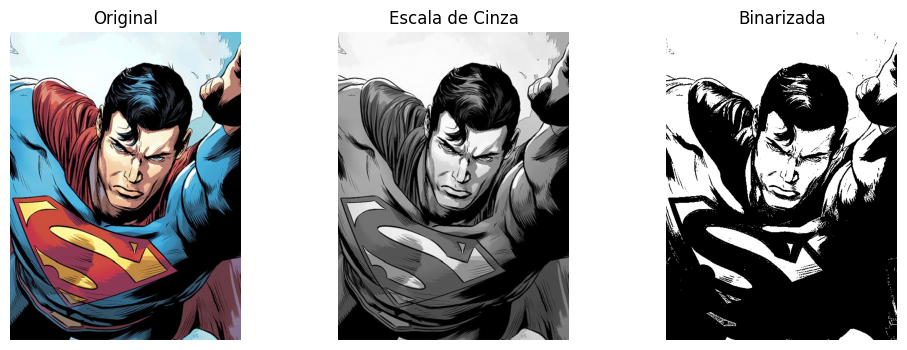

Imagens salvas: saida_cinza.jpg e saida_binaria.jpg


In [7]:
# 1. Importações
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# URL da imagem
url = "https://www.superherodb.com/pictures2/portraits/10/100/791.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("RGB")


# Função para converter para escala de cinza
def converter_para_cinza(img):
    largura, altura = img.size
    img_cinza = Image.new("L", (largura, altura))
    pixels_original = img.load()
    pixels_cinza = img_cinza.load()

    for y in range(altura):
        for x in range(largura):
            r, g, b = pixels_original[x, y]
            gray = int(0.299 * r + 0.587 * g + 0.114 * b)  # Fórmula perceptual
            pixels_cinza[x, y] = gray

    return img_cinza


# Função para binarizar
def binarizar(img_cinza, threshold=127):
    largura, altura = img_cinza.size
    img_binaria = Image.new("L", (largura, altura))
    pixels_cinza = img_cinza.load()
    pixels_binaria = img_binaria.load()

    for y in range(altura):
        for x in range(largura):
            valor = pixels_cinza[x, y]
            pixels_binaria[x, y] = 255 if valor >= threshold else 0

    return img_binaria



img_cinza = converter_para_cinza(img)
img_binaria = binarizar(img_cinza, threshold=127)

# Exibir todas as imagens no Colab
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_cinza, cmap="gray")
plt.title("Escala de Cinza")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_binaria, cmap="gray")
plt.title("Binarizada")
plt.axis("off")

plt.show()

# 7. Salvar os arquivos e exibir
img_cinza.save("saida_cinza.jpg")
img_binaria.save("saida_binaria.jpg")
print("Imagens salvas: saida_cinza.jpg e saida_binaria.jpg")